## IMPORT LIBRARIES & SETUP DATASET DIRECTORIES

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_reportreport
import matplotlib.pyplot as plt
import numpy as np

# Define paths to dataset directories
train_dir = 'C:\sudeepthi\Training'
val_dir = 'C:\sudeepthi\Validation'
test_dir = 'C:\sudeepthi\Testing'

# Define image size and batch size
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


## DEFINE AND TRAIN MODELS

1. MOBILENETV2

In [2]:
def build_mobilenetv2_model(input_shape, num_classes):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mobilenetv2_model = build_mobilenetv2_model(IMG_SIZE + (3,), train_generator.num_classes)
mobilenetv2_history = mobilenetv2_model.fit(train_generator, validation_data=val_generator, epochs=10)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


C:\Users\sudeepthi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 354ms/step - accuracy: 0.6678 - loss: 0.7468 - val_accuracy: 0.8798 - val_loss: 0.3010
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 35s 328ms/step - accuracy: 0.8816 - loss: 0.3156 - val_accuracy: 0.9111 - val_loss: 0.2395
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 34s 326ms/step - accuracy: 0.9069 - loss: 0.2598 - val_accuracy: 0.9183 - val_loss: 0.2149
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 442ms/step - accuracy: 0.9172 - loss: 0.2246 - val_accuracy: 0.9279 - val_loss: 0.2080
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 371ms/step - accuracy: 0.9194 - loss: 0.2271 - val_accuracy: 0.9279 - val_loss: 0.1993
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 35s 335ms/step - accuracy: 0.9249 - loss: 0.2074 - val_accuracy: 0.9303 - val_loss: 0.1800
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 343ms/step - accuracy: 0.9181 - loss: 0.2182 - val_accuracy: 0.9351 - val_loss: 0.1792
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 35s 336ms/step - accuracy: 0.9306 - loss: 0.1920 - val

2. RESNET50

In [3]:
def build_resnet50_model(input_shape, num_classes):
    base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

resnet50_model = build_resnet50_model(IMG_SIZE + (3,), train_generator.num_classes)
resnet50_history = resnet50_model.fit(train_generator, validation_data=val_generator, epochs=10)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 92s 844ms/step - accuracy: 0.3565 - loss: 1.1061 - val_accuracy: 0.3894 - val_loss: 1.0671
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 87s 846ms/step - accuracy: 0.3940 - loss: 1.0670 - val_accuracy: 0.4351 - val_loss: 1.0395
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 88s 851ms/step - accuracy: 0.4145 - loss: 1.0540 - val_accuracy: 0.4038 - val_loss: 1.0277
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 98s 942ms/step - accuracy: 0.4119 - loss: 1.0423 - val_accuracy: 0.4784 - val_loss: 1.0110
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 93s 904ms/step - accuracy: 0.4507 - loss: 1.0285 - val_accuracy: 0.4303 - val_loss: 1.0097
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 90s 873ms/step - accuracy: 0.4426 - loss: 1.0269 - val_accuracy: 0.4423 - val_loss: 1.0025
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 94s 914ms/step - accuracy: 0.4463 - loss: 1.0190 - val_accuracy: 0.4327 - val_loss: 1.0117
Epoch 8/10
102/102 ━━━━━━━━━━━━

3. EFFICIENTNETB0

In [4]:
def build_efficientnetb0_model(input_shape, num_classes):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

efficientnetb0_model = build_efficientnetb0_model(IMG_SIZE + (3,), train_generator.num_classes)
efficientnetb0_history = efficientnetb0_model.fit(train_generator, validation_data=val_generator, epochs=10)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 55s 456ms/step - accuracy: 0.3927 - loss: 1.0832 - val_accuracy: 0.3918 - val_loss: 1.0819
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 430ms/step - accuracy: 0.3903 - loss: 1.0858 - val_accuracy: 0.3918 - val_loss: 1.0796
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 431ms/step - accuracy: 0.3945 - loss: 1.0807 - val_accuracy: 0.3918 - val_loss: 1.0841
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 50s 474ms/step - accuracy: 0.3974 - loss: 1.0845 - val_accuracy: 0.3918 - val_loss: 1.0831
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 47s 451ms/step - accuracy: 0.3821 - loss: 1.0896 - val_accuracy: 0.3918 - val_loss: 1.0798
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 47s 444ms/step - accuracy: 0.3786 - loss: 1.0838 - val_accuracy: 0.3918 - val_loss: 1.0801
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 440ms/step - accuracy: 0.3993 - loss: 1.0856 - val_accuracy: 0.3918 - val_loss: 1.0816
Epoch 8/10
102/102 ━━━━━━━━━━━━━

In [5]:
mobilenetv2_path = 'models/mobilenetv2_model.h5'
resnet50_path = 'models/resnet50_model.h5'
efficientnetb0_path = 'models/efficientnetb0_model.h5'

# Save the models
mobilenetv2_model.save(mobilenetv2_path)
resnet50_model.save(resnet50_path)
efficientnetb0_model.save(efficientnetb0_path)

## EVALUATE MODELS

In [6]:
def evaluate_model(model, test_generator):
    test_loss, test_accuracy = model.evaluate(test_generator)
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    return test_loss, test_accuracy, report

mobilenetv2_results = evaluate_model(mobilenetv2_model, test_generator)
resnet50_results = evaluate_model(resnet50_model, test_generator)
efficientnetb0_results = evaluate_model(efficientnetb0_model, test_generator)

print("MobileNetV2 Evaluation")
print("Loss:", mobilenetv2_results[0], "Accuracy:", mobilenetv2_results[1])
print(mobilenetv2_results[2])

print("ResNet50 Evaluation")
print("Loss:", resnet50_results[0], "Accuracy:", resnet50_results[1])
print(resnet50_results[2])

print("EfficientNetB0 Evaluation")
print("Loss:", efficientnetb0_results[0], "Accuracy:", efficientnetb0_results[1])
print(efficientnetb0_results[2])

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.8954 - loss: 0.2799
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 753ms/step - accuracy: 0.2700 - loss: 1.0721
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.7108 - loss: 1.0199
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 432ms/step
MobileNetV2 Evaluation
Loss: 0.24707162380218506 Accuracy: 0.9061728119850159
              precision    recall  f1-score   support

Early_Blight       0.94      0.93      0.93       162
     Healthy       0.93      0.79      0.86       102
 Late_Blight       0.86      0.96      0.91       141

    accuracy                           0.91       405
   macro avg       0.91      0.89      0.90       405
weighted avg       0.91      0.91      0.91       405

ResNet50 Evaluation
Loss: 1.010843276977539 Accuracy: 0.43703705072402954
              precision    recall  f1-score   support

Early_Blight       0.32      0.19      0.24       162
     Healt

C:\Users\sudeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## COMPARE PERFORMANCE

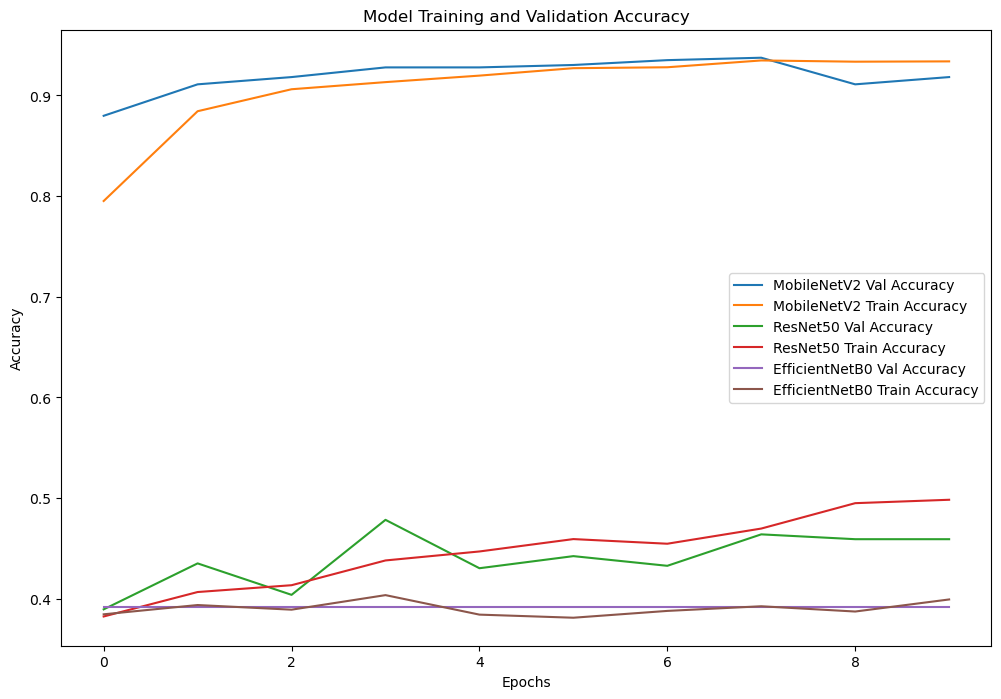

In [7]:
def plot_history(histories, title):
    plt.figure(figsize=(12, 8))
    for name, history in histories:
        plt.plot(history.history['val_accuracy'], label=name + ' Val Accuracy')
        plt.plot(history.history['accuracy'], label=name + ' Train Accuracy')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history([('MobileNetV2', mobilenetv2_history), ('ResNet50', resnet50_history), ('EfficientNetB0', efficientnetb0_history)], 'Model Training and Validation Accuracy')

## LOAD THE MODELS

In [8]:
from tensorflow.keras.models import load_model

mobilenetv2_model_loaded = load_model(mobilenetv2_path)
resnet50_model_loaded = load_model(resnet50_path)
efficientnetb0_model_loaded = load_model(efficientnetb0_path)

# Evaluate the loaded models (optional)
mobilenetv2_results_loaded = evaluate_model(mobilenetv2_model_loaded, test_generator)
resnet50_results_loaded = evaluate_model(resnet50_model_loaded, test_generator)
efficientnetb0_results_loaded = evaluate_model(efficientnetb0_model_loaded, test_generator)

print("Loaded MobileNetV2 Evaluation")
print("Loss:", mobilenetv2_results_loaded[0], "Accuracy:", mobilenetv2_results_loaded[1])
print(mobilenetv2_results_loaded[2])

print("Loaded ResNet50 Evaluation")
print("Loss:", resnet50_results_loaded[0], "Accuracy:", resnet50_results_loaded[1])
print(resnet50_results_loaded[2])

print("Loaded EfficientNetB0 Evaluation")
print("Loss:", efficientnetb0_results_loaded[0], "Accuracy:", efficientnetb0_results_loaded[1])
print(efficientnetb0_results_loaded[2])

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.8954 - loss: 0.2799
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 334ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 906ms/step - accuracy: 0.2700 - loss: 1.0721
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 945ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.7108 - loss: 1.0199
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 467ms/step
Loaded MobileNetV2 Evaluation
Loss: 0.24707162380218506 Accuracy: 0.9061728119850159
              precision    recall  f1-score   support

Early_Blight       0.94      0.93      0.93       162
     Healthy       0.93      0.79      0.86       102
 Late_Blight       0.86      0.96      0.91       141

    accuracy                           0.91       405
   macro avg       0.91      0.89      0.90       405
weighted avg       0.91      0.91      0.91       405

Loaded ResNet50 Evaluation
Loss: 1.010843276977539 Accuracy: 0.43703705072402954
              precision    recall  f1-score   support

Early_Blight       0.32      0.19      0.24     

C:\Users\sudeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


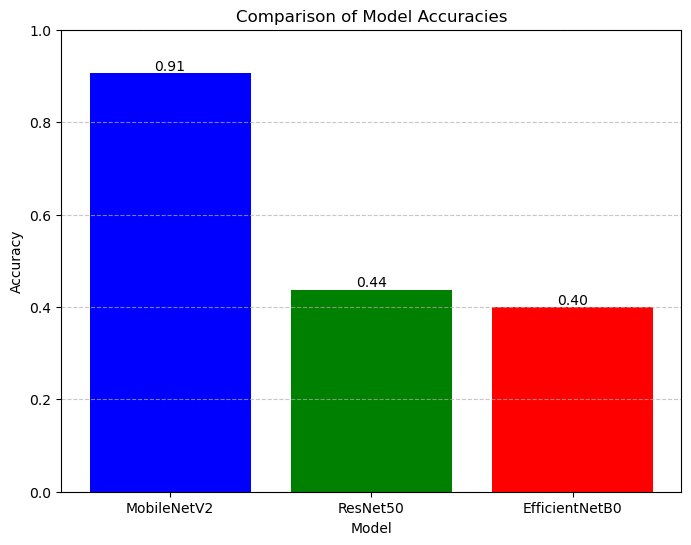

In [15]:
import matplotlib.pyplot as plt

# Define model names and their accuracies
model_names = ['MobileNetV2', 'ResNet50', 'EfficientNetB0']
accuracies = [mobilenetv2_results_loaded[1], resnet50_results_loaded[1], efficientnetb0_results_loaded[1]]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its accuracy value directly on top of the bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.preprocessing.image import load_img

# Define a function to preprocess and predict an image using a specified model and preprocessing function
def predict_disease(model, img_path, preprocess_func, class_labels):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(160, 160))  # Resize to the expected input size of EfficientNetB0
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_func(img_array)
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Return the predicted class label
    return class_labels[predicted_class], predictions

# Define the class labels for your dataset (example labels)
class_labels = ['Early_Blight', 'Healthy', 'Late_Blight']  # Replace with actual class labels  # Replace with actual class labels

# Path to the image to be predicted
image_path = 'C:\sudeepthi\Testing\Late_Blight\Late_Blight_18.jpg'

# Predict with EfficientNetB0
efficientnetb0_pred, efficientnetb0_pred_prob = predict_disease(efficientnetb0_model_loaded, image_path, efficientnet_preprocess, class_labels)
print(f"EfficientNetB0 Prediction: {efficientnetb0_pred}, Probabilities: {efficientnetb0_pred_prob}")
mobilenetv2_pred, mobilenetv2_pred_prob = predict_disease(mobilenetv2_model_loaded, image_path, mobilenet_preprocess, class_labels)
print(f"MobileNetV2 Prediction: {mobilenetv2_pred}, Probabilities: {mobilenetv2_pred_prob}")
resnet50_pred, resnet50_pred_prob = predict_disease(resnet50_model_loaded, image_path, resnet_preprocess, class_labels)
print(f"ResNet50 Prediction: {resnet50_pred}, Probabilities: {resnet50_pred_prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
EfficientNetB0 Prediction: Early_Blight, Probabilities: [[0.52303094 0.4097197  0.06724928]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MobileNetV2 Prediction: Late_Blight, Probabilities: [[5.249277e-07 4.963968e-10 9.999995e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
ResNet50 Prediction: Late_Blight, Probabilities: [[7.7765634e-20 7.9195992e-21 1.0000000e+00]]


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.preprocessing.image import load_img

# Define a function to preprocess and predict an image using a specified model and preprocessing function
def predict_disease(model, img_path, preprocess_func, class_labels):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(160, 160))  # Resize to the expected input size of EfficientNetB0
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_func(img_array)
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Return the predicted class label
    return class_labels[predicted_class], predictions

# Define the class labels for your dataset (example labels)
class_labels = ['Early_Blight', 'Healthy', 'Late_Blight']  # Replace with actual class labels  # Replace with actual class labels

# Path to the image to be predicted
image_path = 'C:\sudeepthi\Testing\Healthy\Healthy_69.jpg'

# Predict with EfficientNetB0
efficientnetb0_pred, efficientnetb0_pred_prob = predict_disease(efficientnetb0_model_loaded, image_path, efficientnet_preprocess, class_labels)
print(f"EfficientNetB0 Prediction: {efficientnetb0_pred}, Probabilities: {efficientnetb0_pred_prob}")
mobilenetv2_pred, mobilenetv2_pred_prob = predict_disease(mobilenetv2_model_loaded, image_path, mobilenet_preprocess, class_labels)
print(f"MobileNetV2 Prediction: {mobilenetv2_pred}, Probabilities: {mobilenetv2_pred_prob}")
resnet50_pred, resnet50_pred_prob = predict_disease(resnet50_model_loaded, image_path, resnet_preprocess, class_labels)
print(f"ResNet50 Prediction: {resnet50_pred}, Probabilities: {resnet50_pred_prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
EfficientNetB0 Prediction: Early_Blight, Probabilities: [[0.6118362  0.24312736 0.1450364 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MobileNetV2 Prediction: Healthy, Probabilities: [[8.1206678e-04 9.9799335e-01 1.1946415e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
ResNet50 Prediction: Late_Blight, Probabilities: [[2.7509425e-12 2.2637645e-13 1.0000000e+00]]


In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.preprocessing.image import load_img

# Define a function to preprocess and predict an image using a specified model and preprocessing function
def predict_disease(model, img_path, preprocess_func, class_labels):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(160, 160))  # Resize to the expected input size of EfficientNetB0
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_func(img_array)
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Return the predicted class label
    return class_labels[predicted_class], predictions

# Define the class labels for your dataset (example labels)
class_labels = ['Early_Blight', 'Healthy', 'Late_Blight']  # Replace with actual class labels  # Replace with actual class labels

# Path to the image to be predicted
image_path = 'C:\sudeepthi\Testing\Early_Blight\Early_Blight_43.jpg'

# Predict with EfficientNetB0
efficientnetb0_pred, efficientnetb0_pred_prob = predict_disease(efficientnetb0_model_loaded, image_path, efficientnet_preprocess, class_labels)
print(f"EfficientNetB0 Prediction: {efficientnetb0_pred}, Probabilities: {efficientnetb0_pred_prob}")
mobilenetv2_pred, mobilenetv2_pred_prob = predict_disease(mobilenetv2_model_loaded, image_path, mobilenet_preprocess, class_labels)
print(f"MobileNetV2 Prediction: {mobilenetv2_pred}, Probabilities: {mobilenetv2_pred_prob}")
resnet50_pred, resnet50_pred_prob = predict_disease(resnet50_model_loaded, image_path, resnet_preprocess, class_labels)
print(f"ResNet50 Prediction: {resnet50_pred}, Probabilities: {resnet50_pred_prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
EfficientNetB0 Prediction: Early_Blight, Probabilities: [[0.55826336 0.18569995 0.25603667]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MobileNetV2 Prediction: Early_Blight, Probabilities: [[9.9864227e-01 1.9962599e-05 1.3377144e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
ResNet50 Prediction: Late_Blight, Probabilities: [[6.4008728e-14 2.8499511e-16 1.0000000e+00]]
